In [1]:
import sys
sys.path.append('/mnt/home/mbedell/.local/lib/python3.7/site-packages')

In [2]:
%matplotlib inline

In [3]:
%run notebook_setup.py

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import glob
from tqdm import tqdm
import h5py

In [5]:
data_dir = '/mnt/ceph/users/mbedell/tess/'
fns = glob.glob(data_dir+'sector*.hdf5')

In [6]:
ts = []
bkgs = []
for fn in tqdm(fns):
    with h5py.File(fn,'r') as f:
        bkgs.append(np.copy(f['median_bkg']))
        ts.append(np.copy(f['time']))

100%|██████████| 6/6 [00:00<00:00, 11.57it/s]


In [7]:
t = np.concatenate(ts)
inds = np.argsort(t)
t = t[inds]
bkg = np.concatenate(bkgs)[inds]

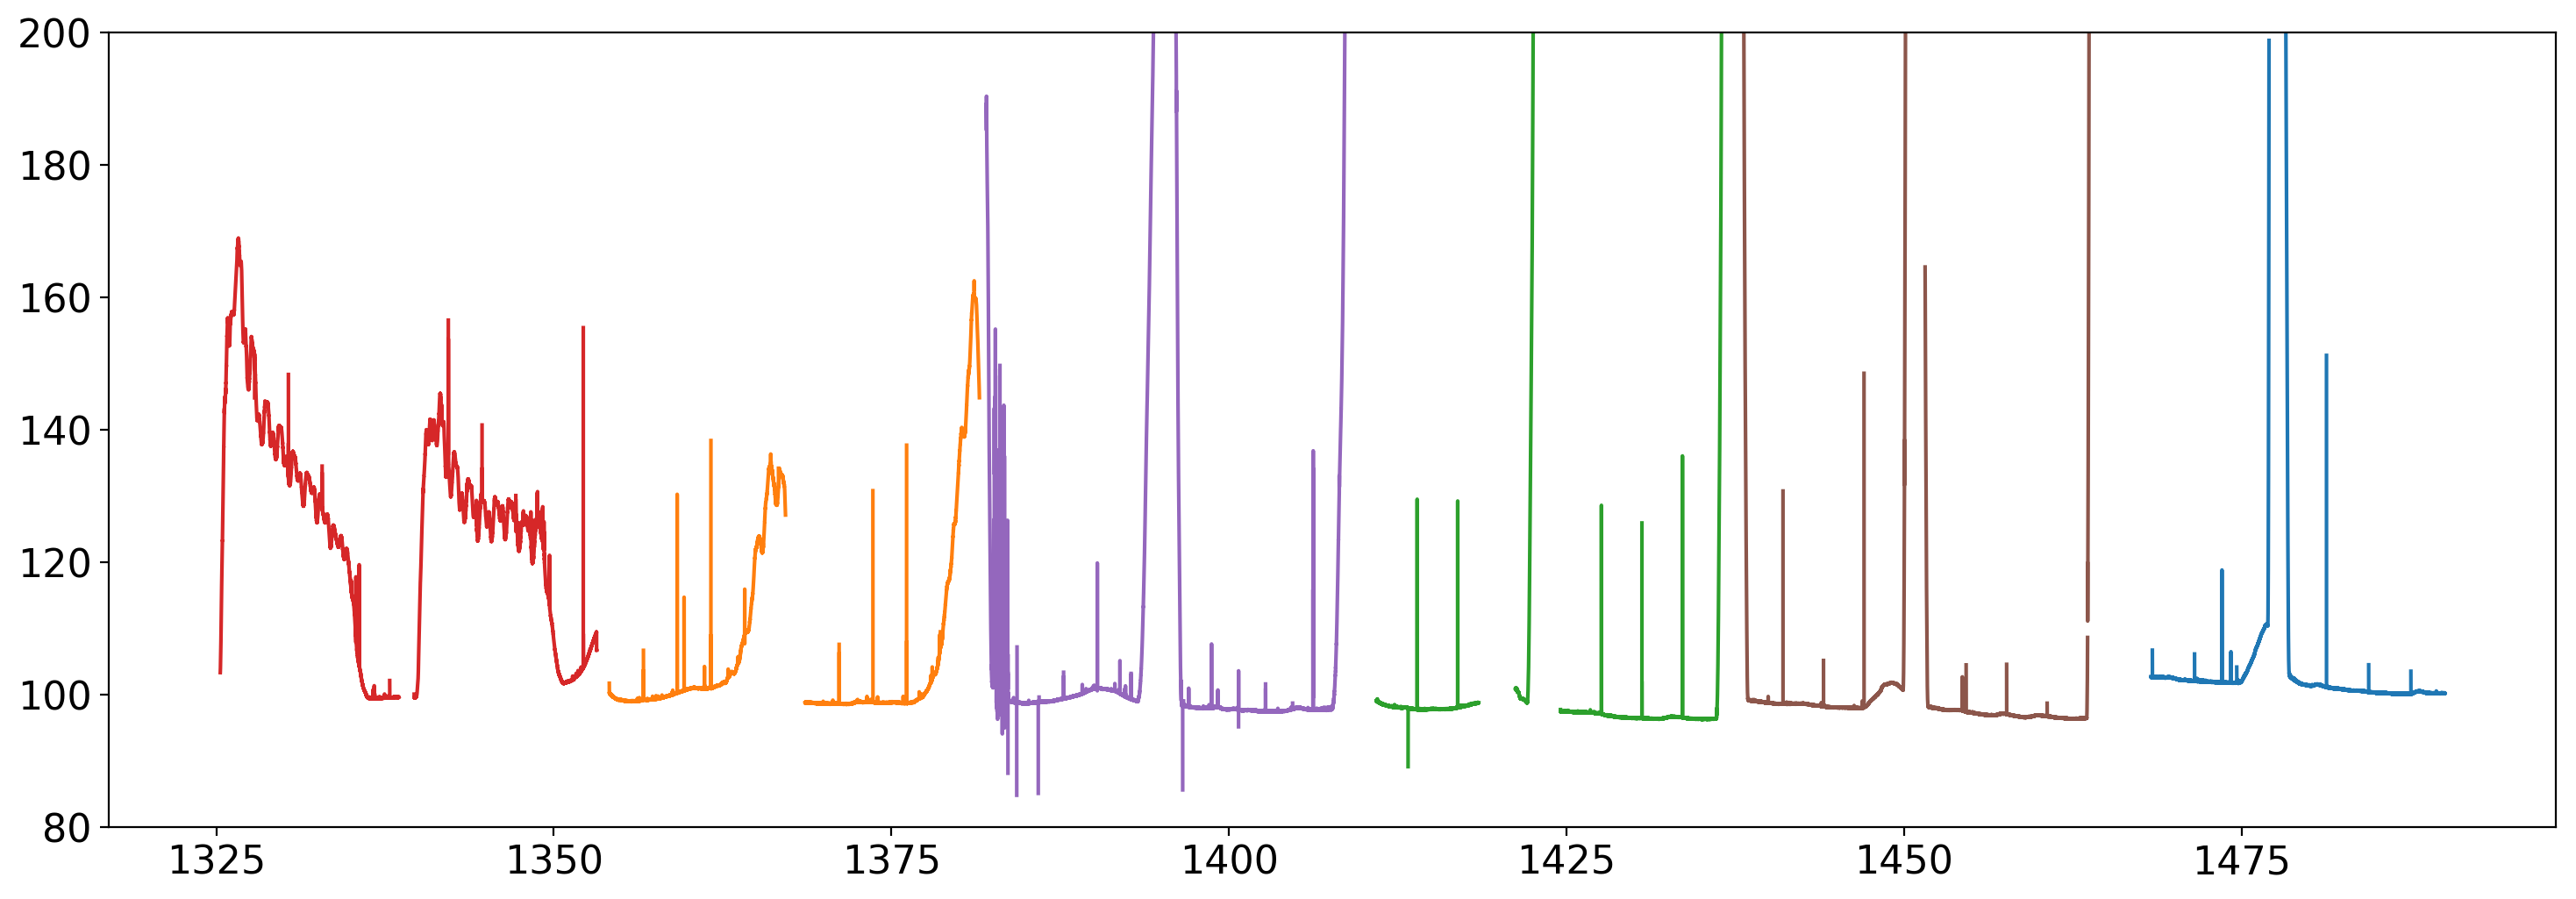

In [8]:
fig,ax = plt.subplots(1,1,figsize=(18,6))
for tt,bb in zip(ts, bkgs):
    ax.plot(tt,bb)
#ax.plot(t,bkg,'k.')
ax.set_ylim([80,200]);

In [8]:
with h5py.File(data_dir+'all_sectors.hdf5', 'w') as f:
    f.create_dataset('time', data=t)
    f.create_dataset('median_bkg', data=bkg)

In [9]:
with h5py.File(data_dir+'sector02.hdf5','r') as f:
    cols = np.copy(f['cols'])
    rows = np.copy(f['rows'])
    ccds = np.copy(f['ccds'])
    cameras = np.copy(f['cameras'])
    bkgs = np.copy(f['bkgs'])
    time = np.copy(f['time'])
    bkg = np.copy(f['median_bkg'])

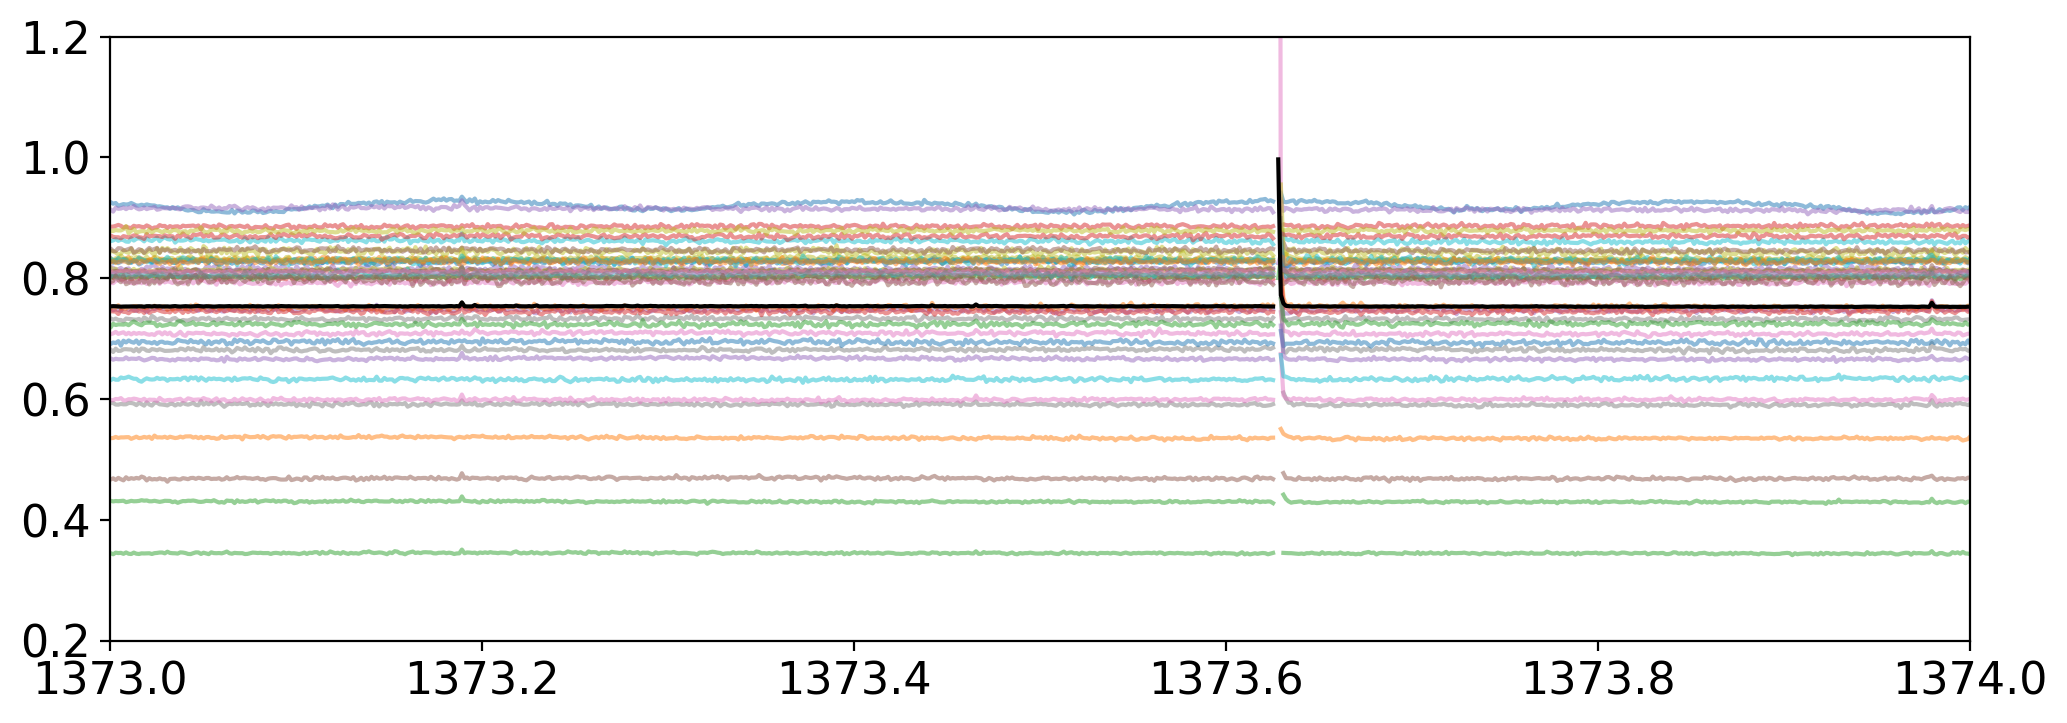

In [10]:
N = len(cameras)
for i in np.linspace(0,N-1,40):
    plt.plot(time, bkgs[int(i)]/np.nanpercentile(bkgs[int(i)], 90), alpha=0.5)
plt.plot(time, bkg/np.nanpercentile(bkg, 90), c='k')
plt.ylim([0.2,1.2])
plt.xlim([1373,1374]);

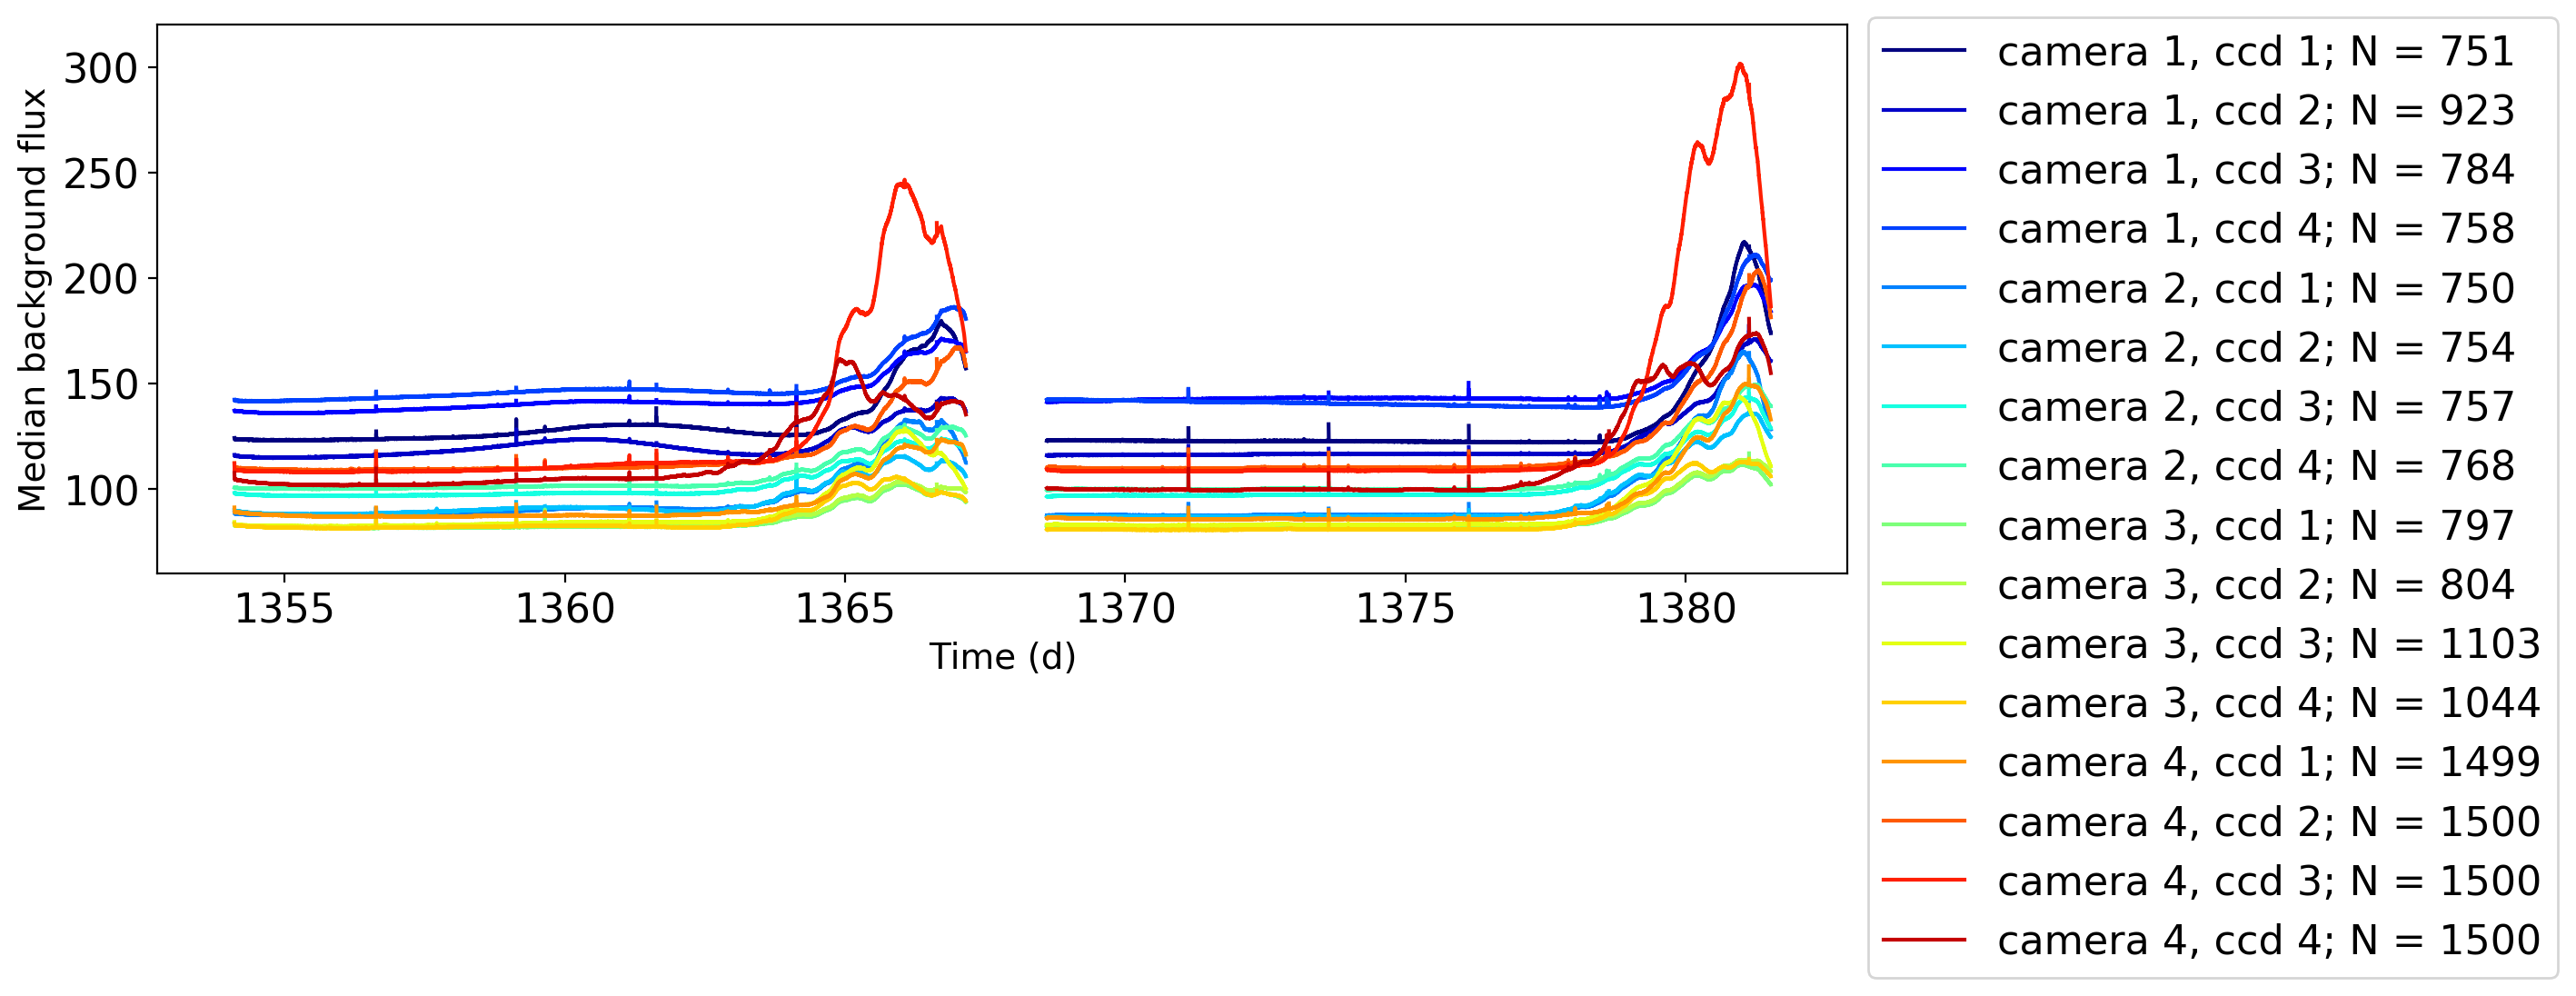

In [21]:
cm = plt.get_cmap('jet')
i = 0
for cam in range(1,5):
    for chip in range(1,5):
        mask = (cameras == cam) & (ccds == chip)
        plt.plot(time, np.nanmedian(bkgs[mask], axis=0),
                 label='camera {0}, ccd {1}; N = {2}'.format(cam,chip,np.sum(mask)), ms=2,
                 c=cm(1.*i/16))
        i += 1
plt.legend(bbox_to_anchor=(1.0, 1.05))
plt.ylim([60,320])
plt.xlabel('Time (d)', fontsize=14)
plt.ylabel('Median background flux', fontsize=14);